### Importing the required libraries, methods and modules

In [34]:
#Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

### Importing data from files

In [26]:
# Reading data from the required files
data= pd.read_csv("winequality-red.csv")
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


### Data Cleaning

It is necessary to check if there are any null values and remove them if there are too many unnecessary null values. In the case below, we see that all the columns show false which means that there are no null values present and we can move foreward with the process without having to deal with the null values.

In [27]:
# Checking for null values
data.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

### Assigning data to the variables

Since the model that we are creating is a multiple linear regression model, x is assigned more than one value.

In [28]:
# Assigning values to the variables
x = data[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates','alcohol']].values
y = data['quality'].values

### Splitting the data 

It is necessary to split the given data into test and train sets before we apply an algorithm.

In [29]:
#Splitting the data using the test_train_split method.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

### Applying the linear Regression algorithm

In [30]:
#The algorithm is applied using the LinearRegression method from the sklearn.linear_model package
regressor = LinearRegression()  
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [31]:
#Printing the coefficient and the intercept of the regression line
print(regressor.coef_)
print(regressor.intercept_)

[ 4.12835075e-02 -1.14952802e+00 -1.77927063e-01  2.78700036e-02
 -1.87340739e+00  2.68362616e-03 -2.77748370e-03 -3.15166657e+01
 -2.54486051e-01  9.24040106e-01  2.67797417e-01]
34.998710628721476


### Predicting the result

In [22]:
y_pred = regressor.predict(x_test)

Placing a portion of the whole dataset into a small dataframe and plotting a graph of that portion.

In [23]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(25)


### Plotting the graph

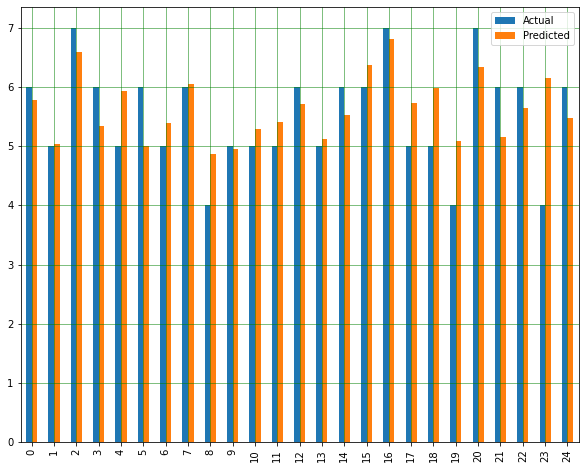

In [32]:
#The graph is plotted using matplotlib.pyplot
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()


Printing the results of the model ie., the Mean Absolute Error, the Mean Squared Error and the Root Mean Squared Error.

In [35]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.4696330928661087
Mean Squared Error: 0.3844711978201226
Root Mean Squared Error: 0.6200574149384254
